# doing a differnt method by Sagnik aka dodo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("synthetic_mental_health_dataset.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sleep_hours          2000 non-null   float64
 1   screen_time          2000 non-null   float64
 2   exercise_minutes     2000 non-null   float64
 3   daily_pending_tasks  2000 non-null   int64  
 4   interruptions        2000 non-null   int64  
 5   fatigue_level        2000 non-null   float64
 6   social_hours         2000 non-null   float64
 7   coffee_cups          2000 non-null   int64  
 8   diet_quality         2000 non-null   object 
 9   weather              2000 non-null   object 
 10  mood_score           2000 non-null   float64
 11  stress_level         2000 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 187.6+ KB


,sleep_hours,screen_time,exercise_minutes,daily_pending_tasks,interruptions,fatigue_level,social_hours,coffee_cups,mood_score,stress_level
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,7.067237,4.990009,19.868516,2.948500,5.131000,4.996769,2.001369,0.989500,7.741658,2.129647
std,1.481299,2.002973,20.071066,1.725206,2.278472,2.000430,0.959934,1.012869,2.023962,1.482866
min,2.138099,0.000000,0.004821,0.000000,0.000000,0.000000,0.000000,0.000000,1.493465,1.000000
25%,6.066007,3.581748,5.580022,2.000000,3.000000,3.647335,1.304384,0.000000,6.090860,1.000000
50%,7.067037,4.999893,13.289737,3.000000,5.000000,4.956565,1.996521,1.000000,7.846064,1.397094
75%,8.024466,6.331087,28.118005,4.000000,7.000000,6.320355,2.653096,2.000000,10.000000,2.932065
max,12.000000,12.852475,150.504069,10.000000,15.000000,10.000000,5.505871,6.000000,10.000000,9.684702


In [3]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 sleep_hours            0
screen_time            0
exercise_minutes       0
daily_pending_tasks    0
interruptions          0
fatigue_level          0
social_hours           0
coffee_cups            0
diet_quality           0
weather                0
mood_score             0
stress_level           0
dtype: int64


In [4]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [5]:
df.head()

,sleep_hours,screen_time,exercise_minutes,daily_pending_tasks,interruptions,fatigue_level,social_hours,coffee_cups,diet_quality,weather,mood_score,stress_level
0,7.745071,3.649643,13.272466,1,5,4.179955,2.448854,1,average,snowy,9.171062,1.000000
1,6.792604,4.710963,1.785436,3,6,4.883679,1.330623,3,good,sunny,5.706491,3.558516
2,7.971533,3.415160,71.843325,4,10,4.207812,2.134120,0,poor,cloudy,10.000000,2.971450
3,9.284545,4.384077,14.596656,2,4,3.362592,1.857070,0,good,sunny,8.385038,1.000000
4,6.648770,1.212771,19.048010,3,5,6.229107,2.642980,1,poor,rainy,10.000000,1.639047


In [6]:
df.tail()

,sleep_hours,screen_time,exercise_minutes,daily_pending_tasks,interruptions,fatigue_level,social_hours,coffee_cups,diet_quality,weather,mood_score,stress_level
1995,8.605225,5.056915,13.765823,3,3,8.362518,3.113966,2,poor,snowy,8.765375,1.086619
1996,6.960218,0.844376,3.364650,2,7,4.869502,3.775442,0,good,rainy,7.796204,1.000000
1997,5.677188,4.359404,4.040437,6,1,7.494879,2.678349,0,average,snowy,4.701231,3.733475
1998,6.755400,8.286756,9.084104,3,1,5.045832,1.955221,2,average,cloudy,6.170718,1.000000
1999,5.882646,5.721296,11.328076,3,3,6.874822,2.187892,0,poor,sunny,5.999456,1.000000


In [7]:
X = df.drop(columns=['stress_level'])
y = df['stress_level']
X_encoded = pd.get_dummies(X, drop_first=True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [9]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Scores
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)
print("Training R² Score:", train_score)
print("Testing  R² Score:", test_score)

total_score = ((train_score - test_score)*100)
print("total:",total_score)

Training R² Score: 0.8142022666551163
Testing  R² Score: 0.7997681411289298
total: 1.4434125526186503


# Fatigue Level Distribution

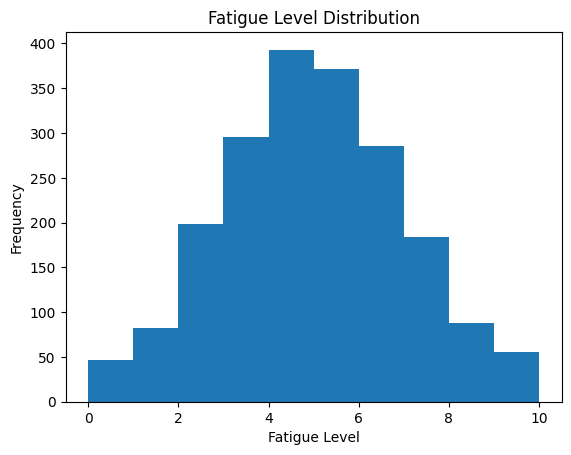

In [10]:
plt.figure()
plt.hist(df['fatigue_level'], bins=10)
plt.xlabel("Fatigue Level")
plt.ylabel("Frequency")
plt.title("Fatigue Level Distribution")
plt.show()

# Sleep Hours Distribution

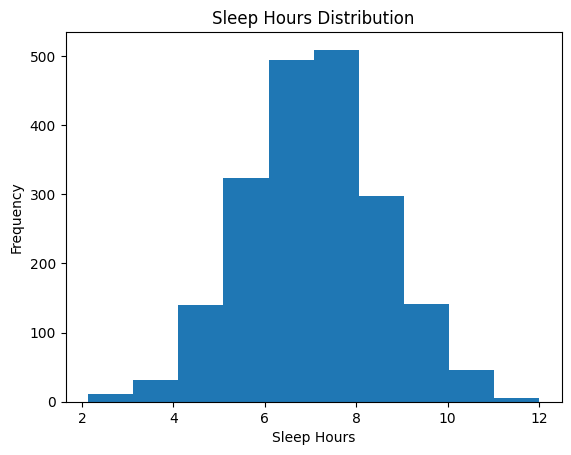

In [11]:
plt.figure()
plt.hist(df['sleep_hours'], bins=10)
plt.xlabel("Sleep Hours")
plt.ylabel("Frequency")
plt.title("Sleep Hours Distribution")
plt.show()

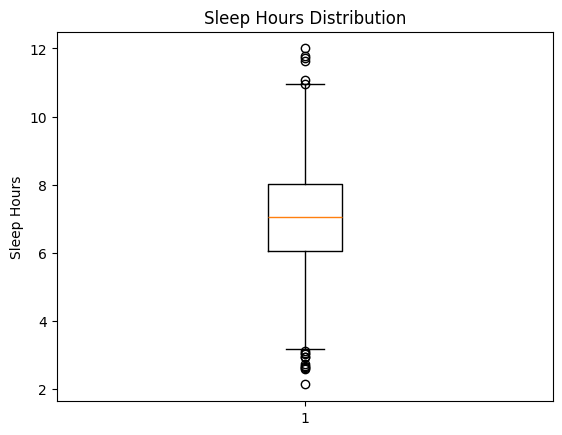

In [12]:
# by box plot 
plt.figure()
plt.boxplot(df['sleep_hours'])
plt.ylabel("Sleep Hours")
plt.title("Sleep Hours Distribution")
plt.show()

# Average Stress Level by Weather

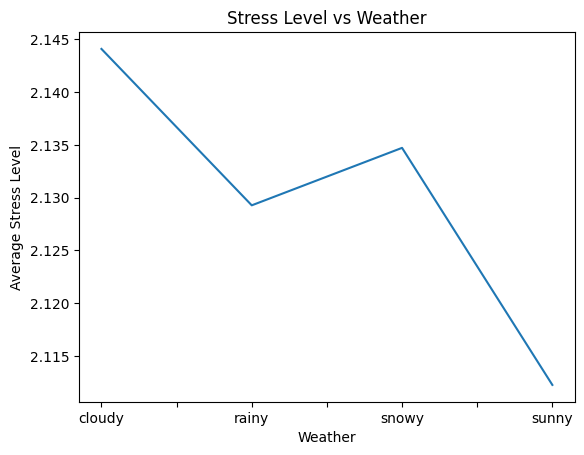

In [13]:
plt.figure()
df.groupby('weather')['stress_level'].mean().plot(kind='line')
plt.xlabel("Weather")
plt.ylabel("Average Stress Level")
plt.title("Stress Level vs Weather")
plt.show()

# Average Sleep Level by Weather

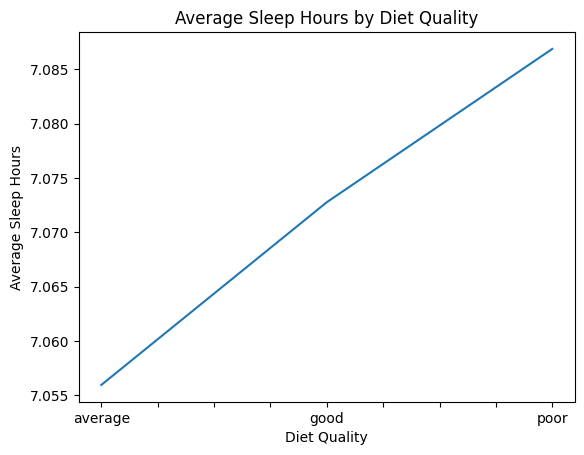

In [14]:
plt.figure()
df.groupby('diet_quality')['sleep_hours'].mean().plot(kind='line')
plt.xlabel("Diet Quality")
plt.ylabel("Average Sleep Hours")
plt.title("Average Sleep Hours by Diet Quality")
plt.show()

# Exercise vs Mood Score

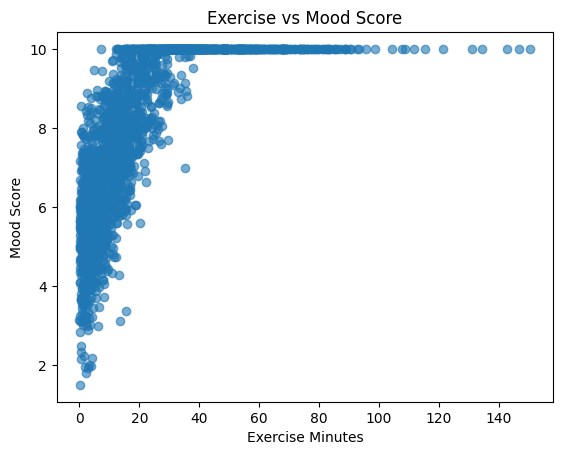

In [15]:
plt.figure()
plt.scatter(df['exercise_minutes'], df['mood_score'], alpha=0.6)
plt.xlabel("Exercise Minutes")
plt.ylabel("Mood Score")
plt.title("Exercise vs Mood Score")
plt.show()